In [1]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import dataPython as dp
import scipy.interpolate as inter

In [240]:
# convert data to array
data = dp.getXYdata_wXYerr('data/100kpc_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

# create an array for the radius
rval = np.arange(0.1,200,0.1)

# make an empty array for a new velocity array to store velocity that's below 300 km/s 
# it seems Noordermeer ignored those points
v_dat_below300 = []

# when v_dat is above 300 km/s, replace it with 273 km/s
# average didn't seem to work as well
for v in range(len(v_dat)):
    if v_dat[v] < 300.0:
        v_dat_below300.append(v_dat[v])
    else:
        v_dat_below300.append(273)
        #v_dat_average = (v_dat[v-2] + v_dat[v+2])/2
        #v_dat_below300.append(v_dat_average)

# convert list to array
v_dat_below300 = np.array(v_dat_below300)

#print(v_dat_below300)

# this is just a guess for a delta_i that's changing with radius
delta_i = 3+r_dat/4

# eq 4.2 on pg 168 in Noordermeer's thesis
v_i = (v_dat_below300 / np.tan(52*(np.pi/180)) * delta_i *(np.pi/180))     

# define grey band
greyb_below = v_dat_below300-v_i
greyb_above = v_dat_below300+v_i

# spline grey band
greyb_below_spline = inter.spline(r_dat,greyb_below,rval,kind='smoothest')
greyb_above_spline = inter.spline(r_dat,greyb_above,rval,kind='smoothest')

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


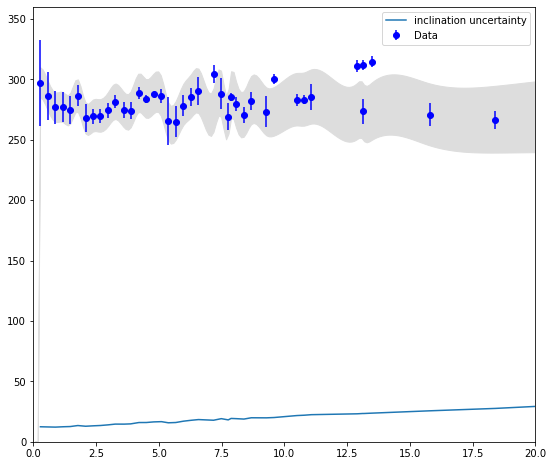

In [241]:
#Plot 

fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,20)
plt.ylim(0,360)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
#plt.errorbar(r_dat,v_dat_below300,yerr=v_err1,fmt='bo',label='Data')

plt.plot(r_dat,v_i,label='inclination uncertainty')
plt.fill_between(rval,greyb_below_spline,greyb_above_spline,color='#dddddd')
#plt.fill_between(r_dat,v_dat-v_i,v_dat+v_i,interpolate=True,color='#dddddd')

plt.legend()
plt.show()